## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set larger figure sizes for better visibility
plt.rcParams['figure.figsize'] = (15, 6)
plt.rcParams['font.size'] = 10

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


In [2]:
# Load the feature-engineered dataset
df = pd.read_csv('../data/featured_superstore.csv')

print('✅ Feature-engineered dataset loaded successfully!')
print(f'📊 Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns')

✅ Feature-engineered dataset loaded successfully!
📊 Dataset shape: 9994 rows, 35 columns


In [3]:
# Identify key columns
date_col = None
sales_col = None

# Find date column
for col in ['Order Date', 'order date', 'Date', 'date', 'Order_Date']:
    if col in df.columns:
        date_col = col
        break

# Find sales column
for col in ['Sales', 'sales', 'SALES']:
    if col in df.columns:
        sales_col = col
        break

print(f'📅 Date column: {date_col}')
print(f'💰 Sales column: {sales_col}')

# Ensure date column is datetime
if date_col:
    df[date_col] = pd.to_datetime(df[date_col])
    print(f'\n📊 Date range: {df[date_col].min()} to {df[date_col].max()}')
    print(f'📊 Total time span: {(df[date_col].max() - df[date_col].min()).days} days')

📅 Date column: Order Date
💰 Sales column: Sales

📊 Date range: 2014-01-03 00:00:00 to 2017-12-30 00:00:00
📊 Total time span: 1457 days


In [4]:
# Quick data overview
print('📋 Dataset Overview:\n')
df.head(10)

📋 Dataset Overview:



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,quarter,week_of_year,sales_lag_1,sales_lag_7,sales_lag_30,sales_rolling_7,sales_rolling_30,is_weekend,is_month_start,is_month_end
0,7981,CA-2014-103800,2014-01-03,2014-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,1,1,NaN,NaN,NaN,NaN,NaN,0,0,0
1,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,1,1,16.448,NaN,NaN,NaN,NaN,1,0,0
2,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,1,1,11.784,NaN,NaN,NaN,NaN,1,0,0
3,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,1,1,272.736,NaN,NaN,NaN,NaN,1,0,0
4,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,1,1,3.540,NaN,NaN,NaN,NaN,1,0,0
5,7477,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,19.536,NaN,NaN,NaN,NaN,0,0,0
6,7475,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,5.480,NaN,NaN,414.763429,NaN,0,0,0
7,7476,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,2573.820,16.448,NaN,499.553714,NaN,0,0,0
8,7181,CA-2014-106054,2014-01-06,2014-01-07,First Class,JO-15145,Jack O'Briant,Corporate,United States,Athens,...,1,2,609.980,11.784,NaN,499.696000,NaN,0,0,0
9,7478,CA-2014-167199,2014-01-06,2014-01-10,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,1,2,12.780,272.736,NaN,516.730857,NaN,0,0,0


## 2. Visualize Sales Trends Over Time

Understand how sales have evolved over the entire time period

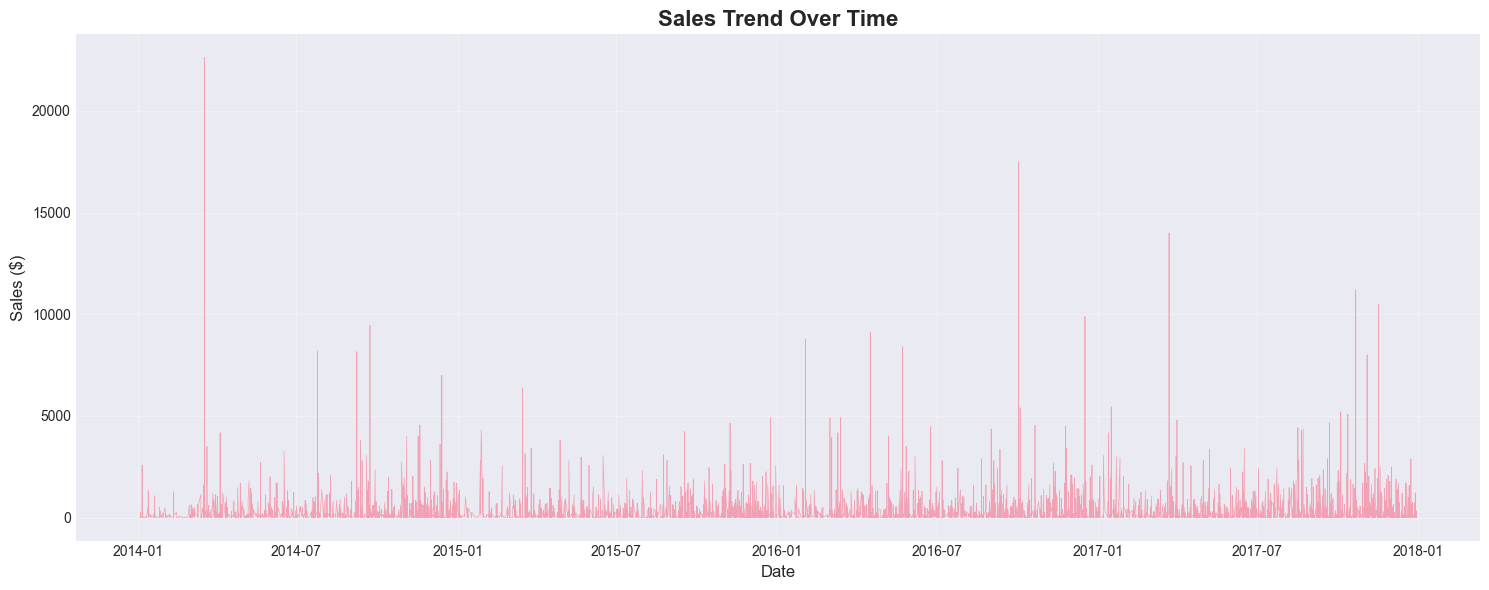

📈 Observation: This shows the raw sales data across all time periods


In [5]:
# Plot sales over time
if date_col and sales_col:
    plt.figure(figsize=(15, 6))
    plt.plot(df[date_col], df[sales_col], alpha=0.6, linewidth=0.5)
    plt.title('Sales Trend Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print('📈 Observation: This shows the raw sales data across all time periods')
else:
    print('⚠️ Cannot plot without date and sales columns')

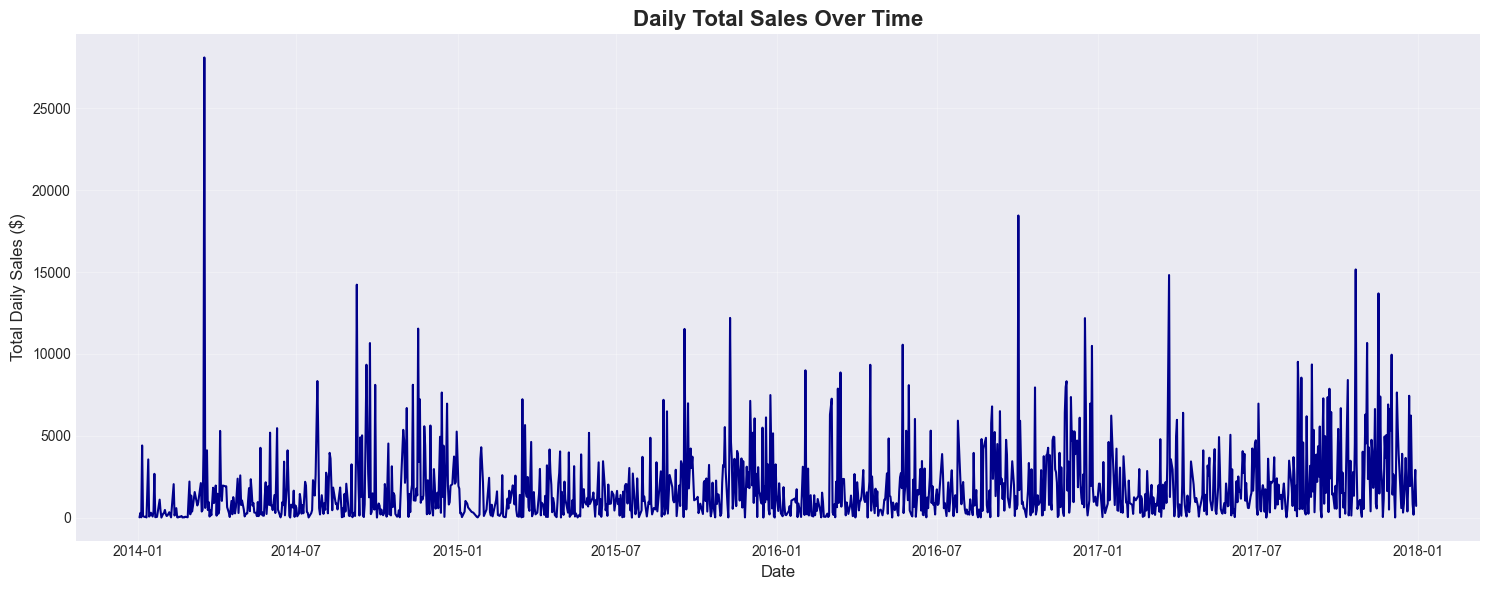


📊 Daily Sales Statistics:
  Average daily sales: $1,857.07
  Median daily sales: $1,063.18
  Highest daily sales: $28,106.72
  Lowest daily sales: $2.02


In [6]:
# Aggregate sales by date to see daily trends more clearly
if date_col and sales_col:
    daily_sales = df.groupby(date_col)[sales_col].sum().reset_index()
    
    plt.figure(figsize=(15, 6))
    plt.plot(daily_sales[date_col], daily_sales[sales_col], linewidth=1.5, color='darkblue')
    plt.title('Daily Total Sales Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Total Daily Sales ($)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Calculate some basic statistics
    print(f'\n📊 Daily Sales Statistics:')
    print(f'  Average daily sales: ${daily_sales[sales_col].mean():,.2f}')
    print(f'  Median daily sales: ${daily_sales[sales_col].median():,.2f}')
    print(f'  Highest daily sales: ${daily_sales[sales_col].max():,.2f}')
    print(f'  Lowest daily sales: ${daily_sales[sales_col].min():,.2f}')

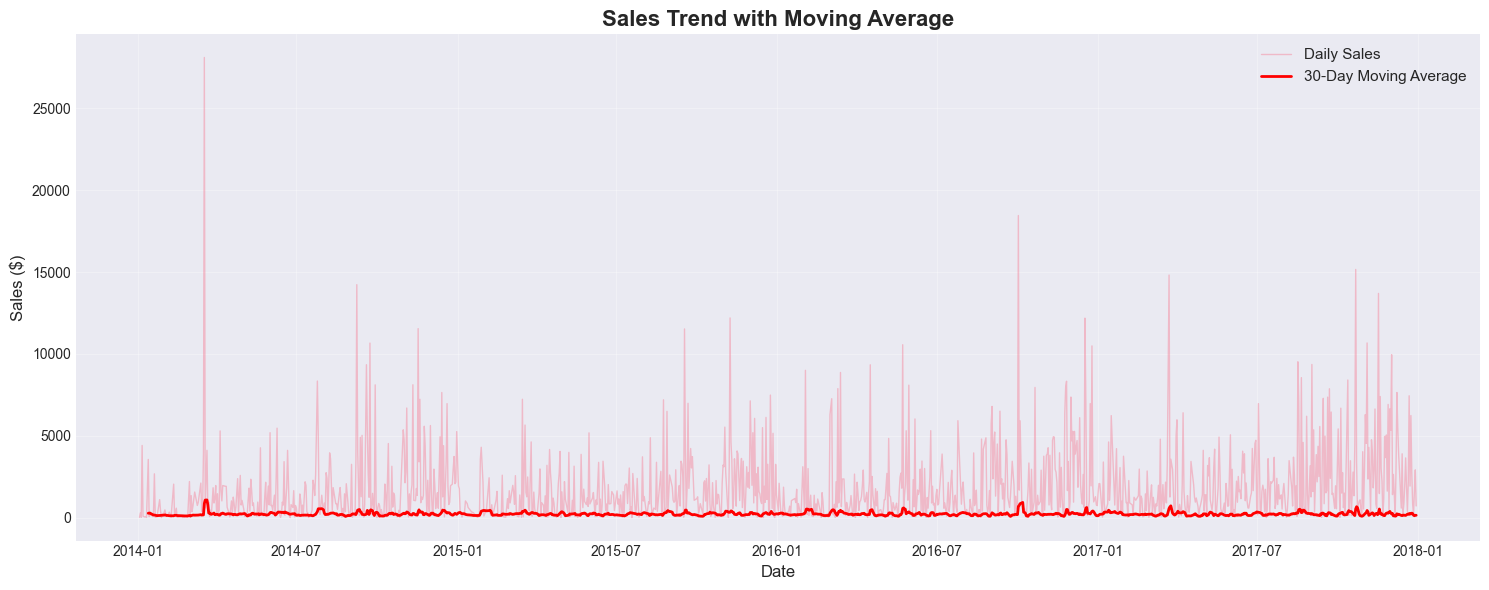

📈 The moving average smooths out daily fluctuations to show the underlying trend


In [7]:
# Sales with moving average overlay
if date_col and sales_col and 'sales_rolling_30' in df.columns:
    # Aggregate by date first
    daily_data = df.groupby(date_col).agg({
        sales_col: 'sum',
        'sales_rolling_30': 'mean'
    }).reset_index()
    
    plt.figure(figsize=(15, 6))
    plt.plot(daily_data[date_col], daily_data[sales_col], alpha=0.4, label='Daily Sales', linewidth=1)
    plt.plot(daily_data[date_col], daily_data['sales_rolling_30'], color='red', 
             label='30-Day Moving Average', linewidth=2)
    plt.title('Sales Trend with Moving Average', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Sales ($)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print('📈 The moving average smooths out daily fluctuations to show the underlying trend')

## 3. Monthly Seasonality Analysis

Discover if certain months have consistently higher or lower sales

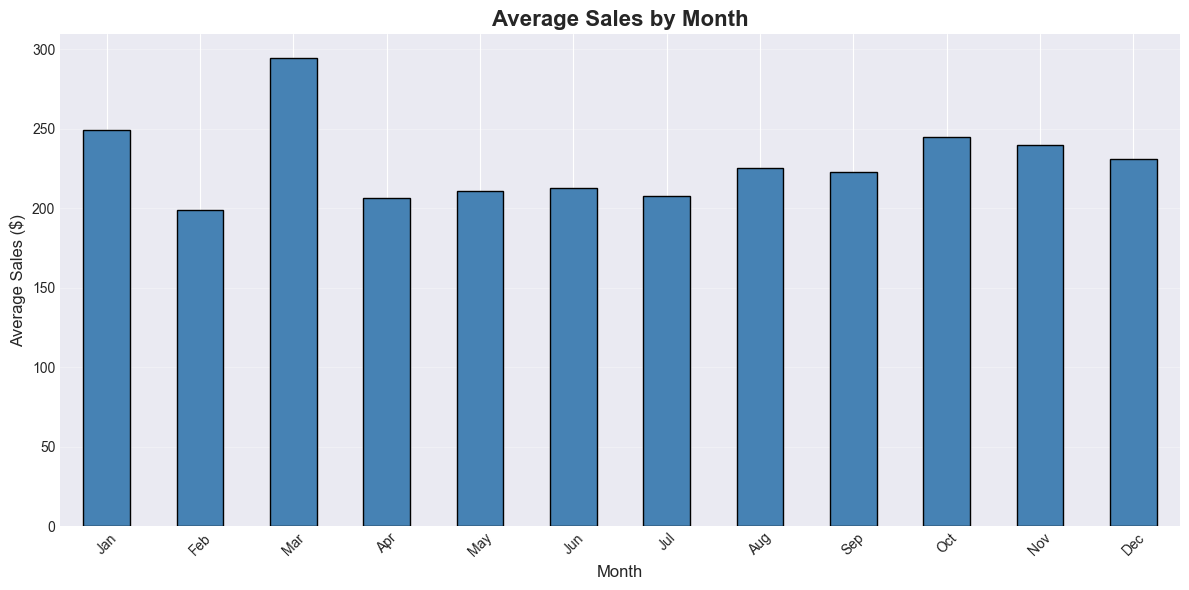


📊 Monthly Sales Insights:
  Highest sales month: Mar ($294.55)
  Lowest sales month: Feb ($199.17)
  Difference: 47.9% higher


In [8]:
# Average sales by month
if 'month' in df.columns and sales_col:
    monthly_sales = df.groupby('month')[sales_col].mean()
    
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title('Average Sales by Month', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Average Sales ($)', fontsize=12)
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Find peak and low months
    peak_month = monthly_sales.idxmax()
    low_month = monthly_sales.idxmin()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    print(f'\n📊 Monthly Sales Insights:')
    print(f'  Highest sales month: {month_names[peak_month-1]} (${monthly_sales.max():,.2f})')
    print(f'  Lowest sales month: {month_names[low_month-1]} (${monthly_sales.min():,.2f})')
    print(f'  Difference: {((monthly_sales.max() / monthly_sales.min() - 1) * 100):.1f}% higher')
else:
    print('⚠️ Month column not found')

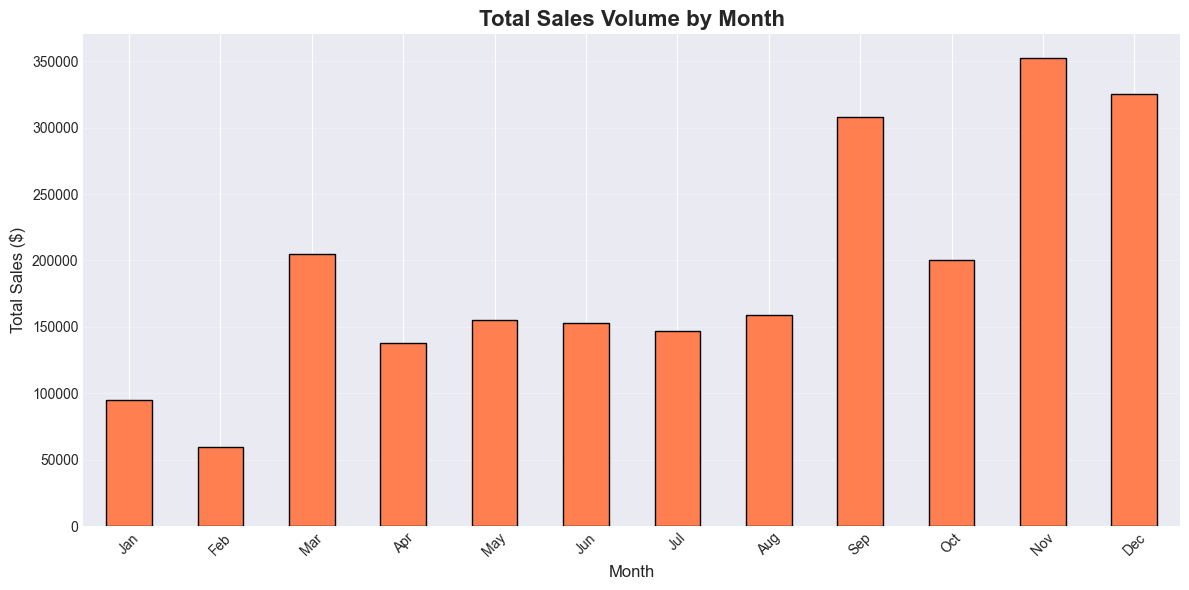


💰 Total monthly sales volume shows cumulative business performance per month


In [9]:
# Total sales by month (volume)
if 'month' in df.columns and sales_col:
    monthly_total_sales = df.groupby('month')[sales_col].sum()
    
    plt.figure(figsize=(12, 6))
    monthly_total_sales.plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Total Sales Volume by Month', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Total Sales ($)', fontsize=12)
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print(f'\n💰 Total monthly sales volume shows cumulative business performance per month')

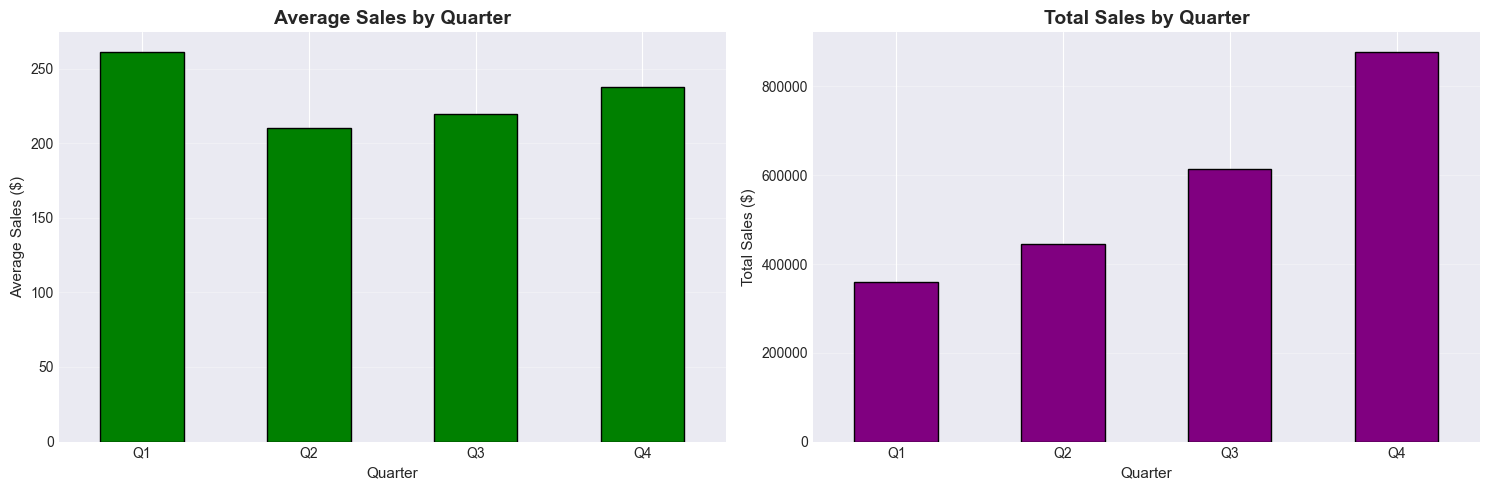


📊 Quarterly patterns help identify seasonal business cycles


In [10]:
# Quarterly analysis
if 'quarter' in df.columns and sales_col:
    quarterly_sales = df.groupby('quarter')[sales_col].agg(['mean', 'sum', 'count'])
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Average sales by quarter
    quarterly_sales['mean'].plot(kind='bar', ax=axes[0], color='green', edgecolor='black')
    axes[0].set_title('Average Sales by Quarter', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Quarter', fontsize=11)
    axes[0].set_ylabel('Average Sales ($)', fontsize=11)
    axes[0].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Total sales by quarter
    quarterly_sales['sum'].plot(kind='bar', ax=axes[1], color='purple', edgecolor='black')
    axes[1].set_title('Total Sales by Quarter', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Quarter', fontsize=11)
    axes[1].set_ylabel('Total Sales ($)', fontsize=11)
    axes[1].set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'], rotation=0)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print('\n📊 Quarterly patterns help identify seasonal business cycles')

## 4. Day of Week Patterns

Analyze if sales differ based on the day of the week

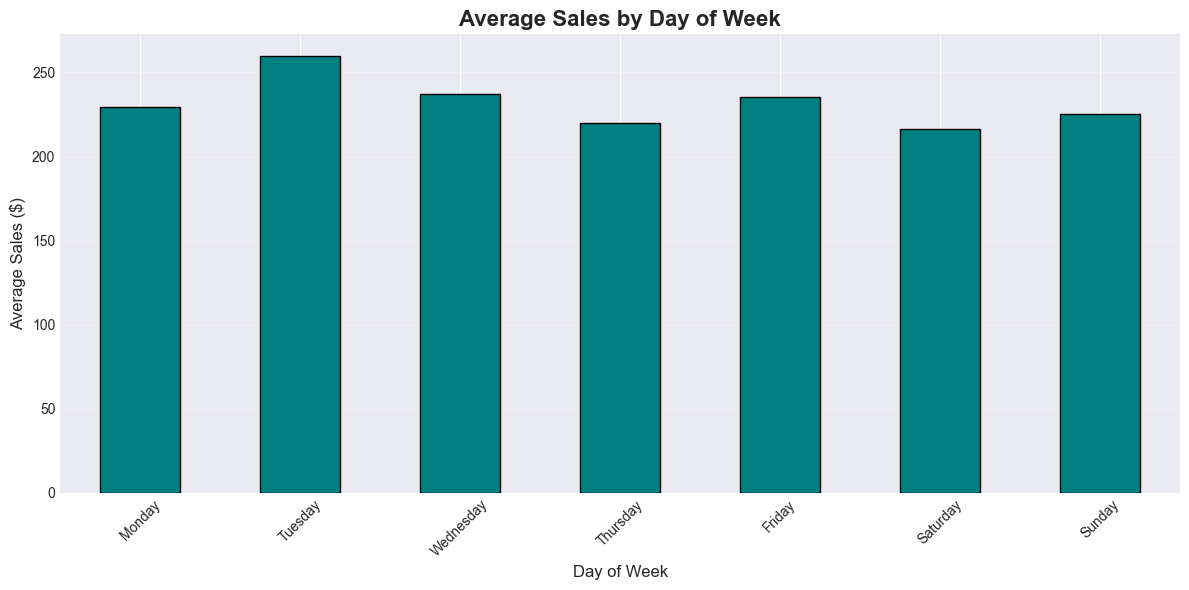


📊 Day of Week Insights:
  Best day: Tuesday ($259.68)
  Worst day: Saturday ($216.30)
  Difference: 20.1% higher


In [11]:
# Average sales by day of week
if 'day_of_week' in df.columns and sales_col:
    dow_sales = df.groupby('day_of_week')[sales_col].mean()
    
    plt.figure(figsize=(12, 6))
    dow_sales.plot(kind='bar', color='teal', edgecolor='black')
    plt.title('Average Sales by Day of Week', fontsize=16, fontweight='bold')
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Average Sales ($)', fontsize=12)
    plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                           'Friday', 'Saturday', 'Sunday'], rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Find best and worst days
    best_day = dow_sales.idxmax()
    worst_day = dow_sales.idxmin()
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    print(f'\n📊 Day of Week Insights:')
    print(f'  Best day: {day_names[best_day]} (${dow_sales.max():,.2f})')
    print(f'  Worst day: {day_names[worst_day]} (${dow_sales.min():,.2f})')
    print(f'  Difference: {((dow_sales.max() / dow_sales.min() - 1) * 100):.1f}% higher')
else:
    print('⚠️ Day of week column not found')

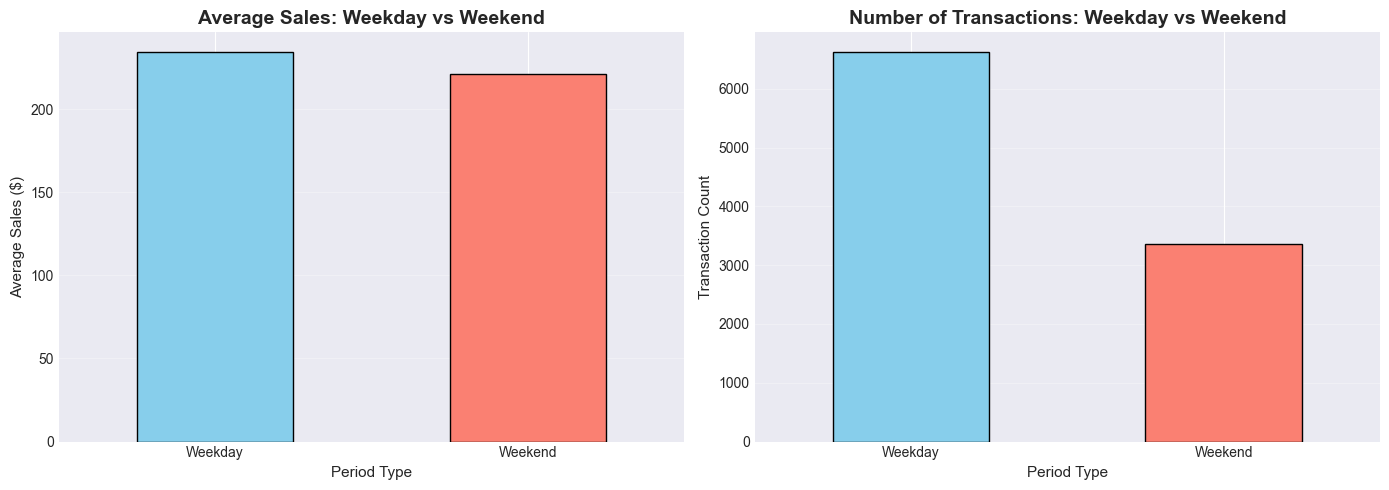


📊 Weekday vs Weekend Analysis:
  Weekday average: $234.40
  Weekend average: $220.90
  Difference: -5.8%


In [12]:
# Weekend vs Weekday comparison
if 'is_weekend' in df.columns and sales_col:
    weekend_comparison = df.groupby('is_weekend')[sales_col].agg(['mean', 'sum', 'count'])
    weekend_comparison.index = ['Weekday', 'Weekend']
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Average sales
    weekend_comparison['mean'].plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'], edgecolor='black')
    axes[0].set_title('Average Sales: Weekday vs Weekend', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Period Type', fontsize=11)
    axes[0].set_ylabel('Average Sales ($)', fontsize=11)
    axes[0].set_xticklabels(['Weekday', 'Weekend'], rotation=0)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Transaction count
    weekend_comparison['count'].plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'], edgecolor='black')
    axes[1].set_title('Number of Transactions: Weekday vs Weekend', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Period Type', fontsize=11)
    axes[1].set_ylabel('Transaction Count', fontsize=11)
    axes[1].set_xticklabels(['Weekday', 'Weekend'], rotation=0)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    weekday_avg = weekend_comparison.loc['Weekday', 'mean']
    weekend_avg = weekend_comparison.loc['Weekend', 'mean']
    
    print(f'\n📊 Weekday vs Weekend Analysis:')
    print(f'  Weekday average: ${weekday_avg:,.2f}')
    print(f'  Weekend average: ${weekend_avg:,.2f}')
    print(f'  Difference: {((weekend_avg / weekday_avg - 1) * 100):+.1f}%')

## 5. Correlation Analysis

Understand relationships between different features

In [13]:
# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f'📊 Analyzing correlations for {len(numeric_cols)} numeric features')
print(f'\nNumeric columns: {numeric_cols}')

📊 Analyzing correlations for 20 numeric features

Numeric columns: ['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit', 'year', 'month', 'day', 'day_of_week', 'quarter', 'week_of_year', 'sales_lag_1', 'sales_lag_7', 'sales_lag_30', 'sales_rolling_7', 'sales_rolling_30', 'is_weekend', 'is_month_start', 'is_month_end']


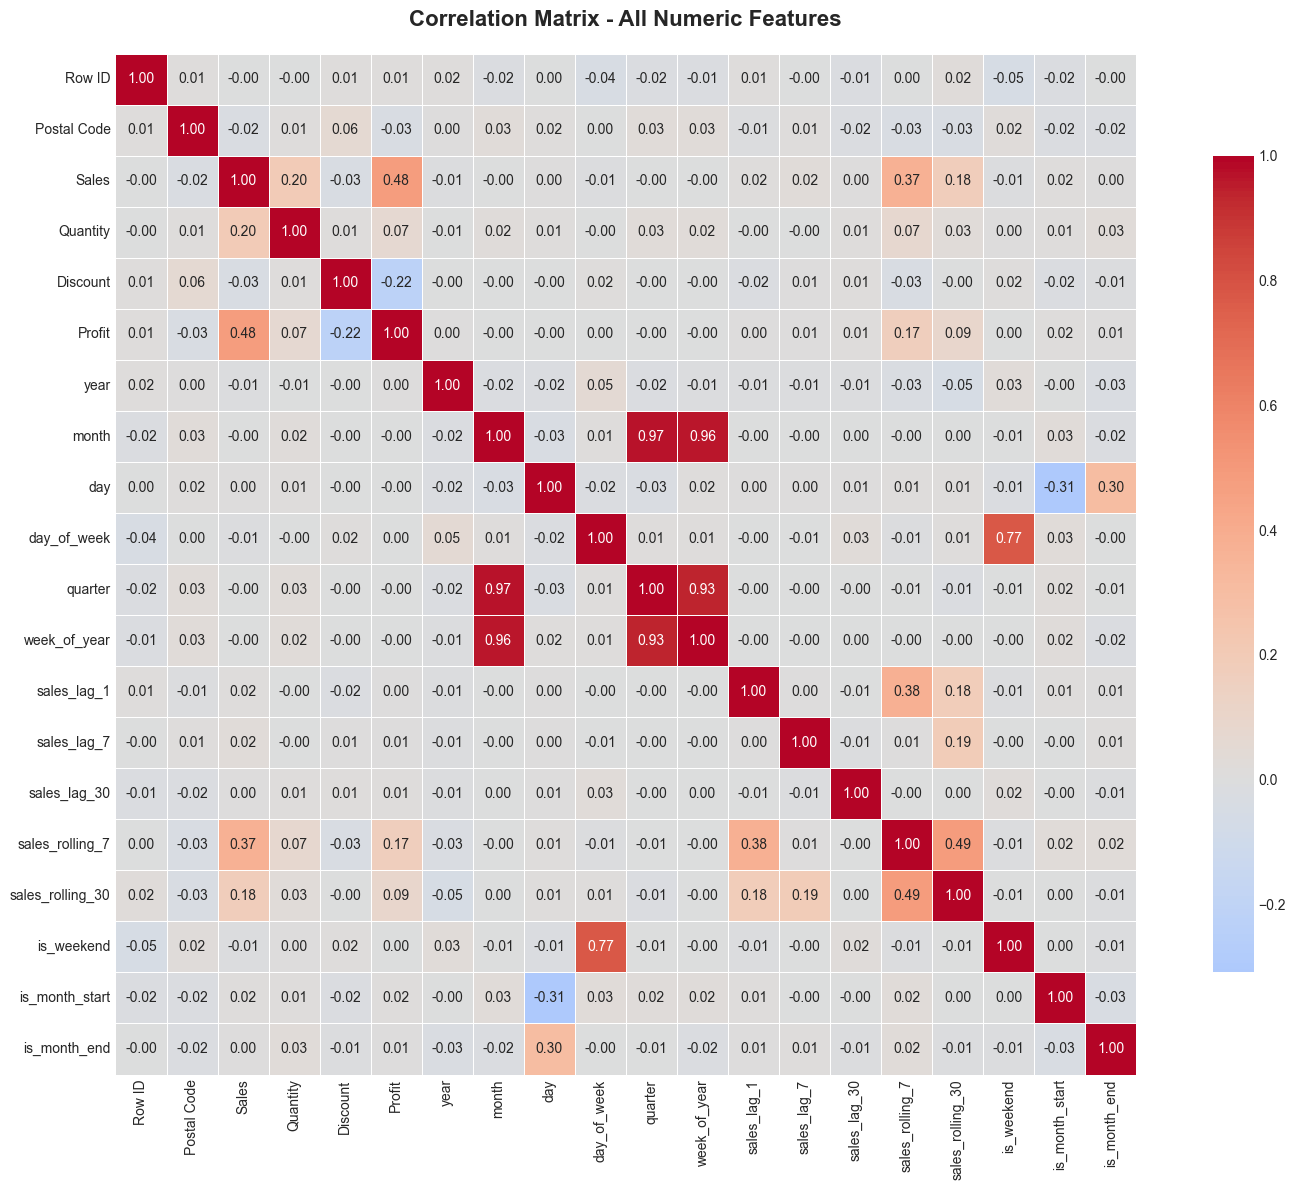

🔍 The correlation matrix shows relationships between all numeric features
   Values close to 1 or -1 indicate strong correlations
   Values close to 0 indicate weak correlations


In [14]:
# Full correlation matrix
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print('🔍 The correlation matrix shows relationships between all numeric features')
print('   Values close to 1 or -1 indicate strong correlations')
print('   Values close to 0 indicate weak correlations')

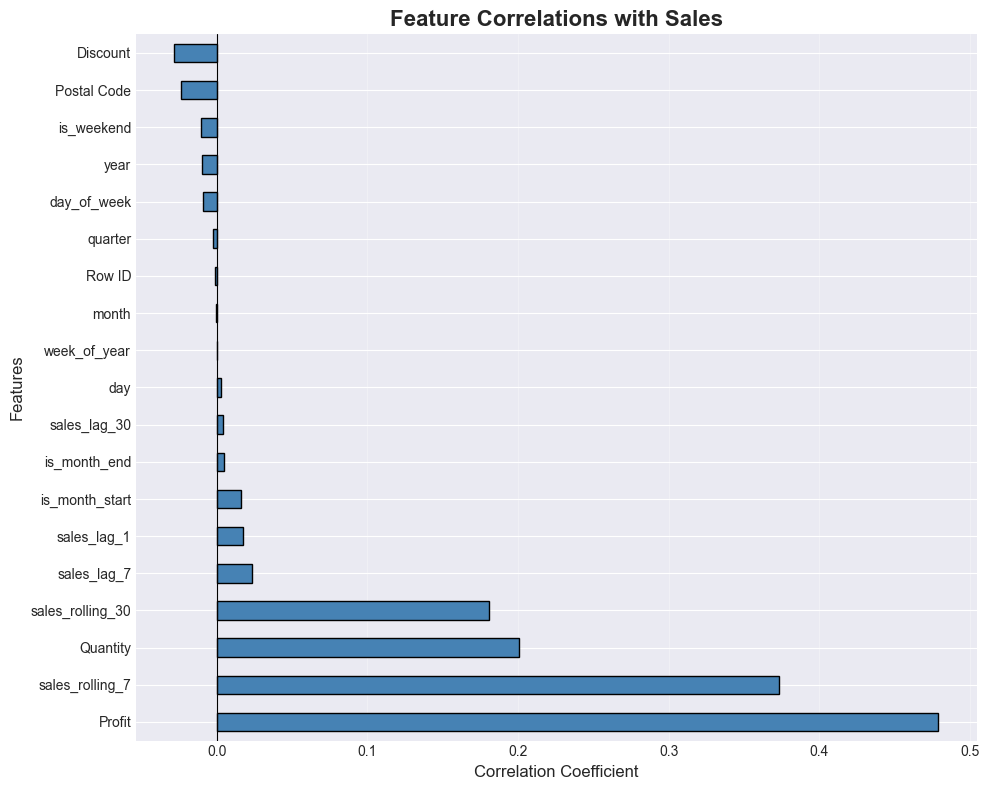


📊 Top 5 Positive Correlations with Sales:
  Profit: 0.479
  sales_rolling_7: 0.373
  Quantity: 0.201
  sales_rolling_30: 0.181
  sales_lag_7: 0.024

📊 Top 5 Negative Correlations with Sales:
  day_of_week: -0.009
  year: -0.010
  is_weekend: -0.010
  Postal Code: -0.024
  Discount: -0.028


In [15]:
# Focus on correlations with Sales column
if sales_col and sales_col in correlation_matrix.columns:
    sales_correlations = correlation_matrix[sales_col].sort_values(ascending=False)
    
    # Remove self-correlation
    sales_correlations = sales_correlations[sales_correlations.index != sales_col]
    
    plt.figure(figsize=(10, 8))
    sales_correlations.plot(kind='barh', color='steelblue', edgecolor='black')
    plt.title(f'Feature Correlations with {sales_col}', fontsize=16, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print(f'\n📊 Top 5 Positive Correlations with {sales_col}:')
    for feature, corr in sales_correlations.head(5).items():
        print(f'  {feature}: {corr:.3f}')
    
    print(f'\n📊 Top 5 Negative Correlations with {sales_col}:')
    for feature, corr in sales_correlations.tail(5).items():
        print(f'  {feature}: {corr:.3f}')

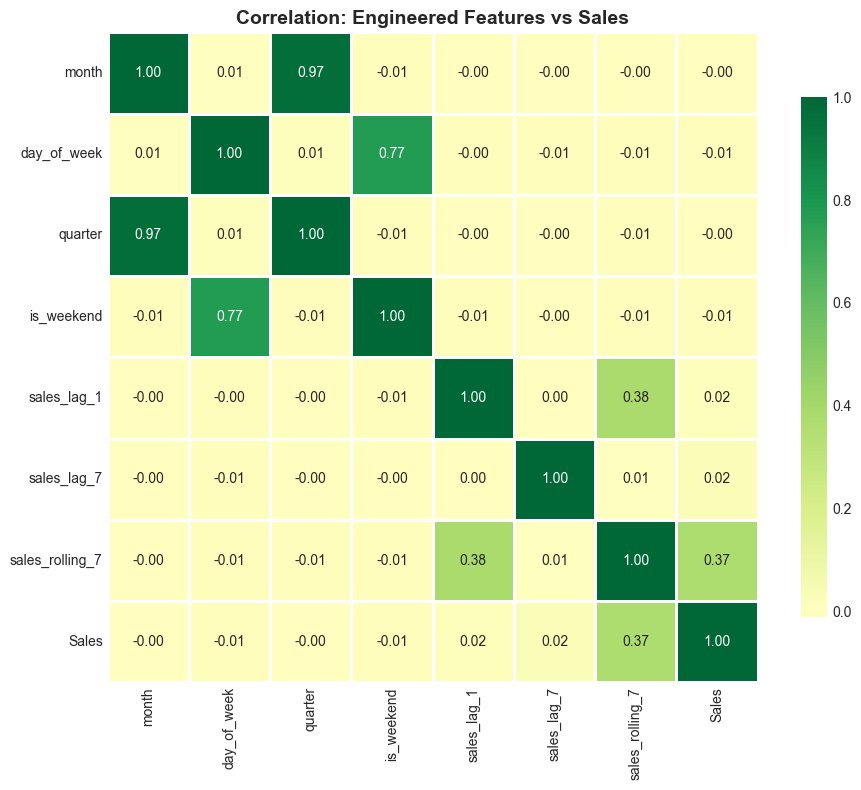

📊 This shows how our engineered features relate to sales and each other


In [16]:
# Correlation between engineered features
engineered_features = ['month', 'day_of_week', 'quarter', 'is_weekend', 
                       'sales_lag_1', 'sales_lag_7', 'sales_rolling_7']
available_engineered = [f for f in engineered_features if f in df.columns]

if sales_col:
    available_engineered.append(sales_col)

if len(available_engineered) > 1:
    engineered_corr = df[available_engineered].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(engineered_corr, annot=True, cmap='RdYlGn', center=0, 
                fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation: Engineered Features vs Sales', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print('📊 This shows how our engineered features relate to sales and each other')

## 6. Additional Insights & Patterns

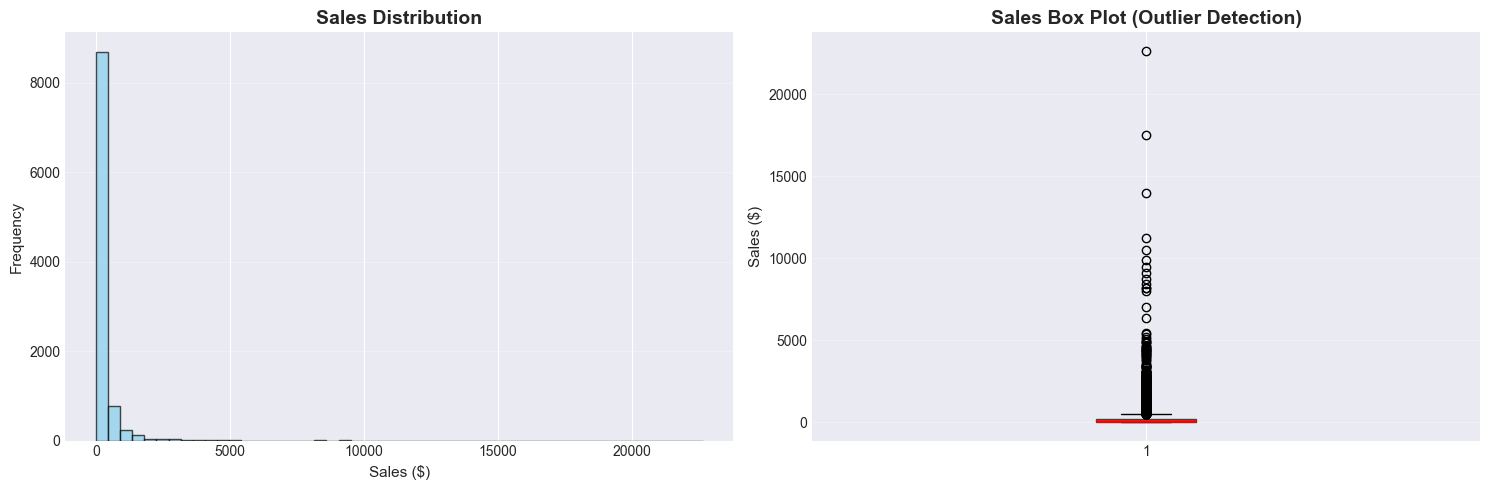


📊 Sales Distribution Statistics:
  Mean: $229.86
  Median: $54.49
  Std Dev: $623.25
  Min: $0.44
  Max: $22,638.48
  25th percentile: $17.28
  75th percentile: $209.94


In [17]:
# Sales distribution
if sales_col:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram
    axes[0].hist(df[sales_col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_title('Sales Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Sales ($)', fontsize=11)
    axes[0].set_ylabel('Frequency', fontsize=11)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Box plot
    axes[1].boxplot(df[sales_col], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightgreen', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Sales Box Plot (Outlier Detection)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Sales ($)', fontsize=11)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Distribution statistics
    print('\n📊 Sales Distribution Statistics:')
    print(f'  Mean: ${df[sales_col].mean():,.2f}')
    print(f'  Median: ${df[sales_col].median():,.2f}')
    print(f'  Std Dev: ${df[sales_col].std():,.2f}')
    print(f'  Min: ${df[sales_col].min():,.2f}')
    print(f'  Max: ${df[sales_col].max():,.2f}')
    print(f'  25th percentile: ${df[sales_col].quantile(0.25):,.2f}')
    print(f'  75th percentile: ${df[sales_col].quantile(0.75):,.2f}')

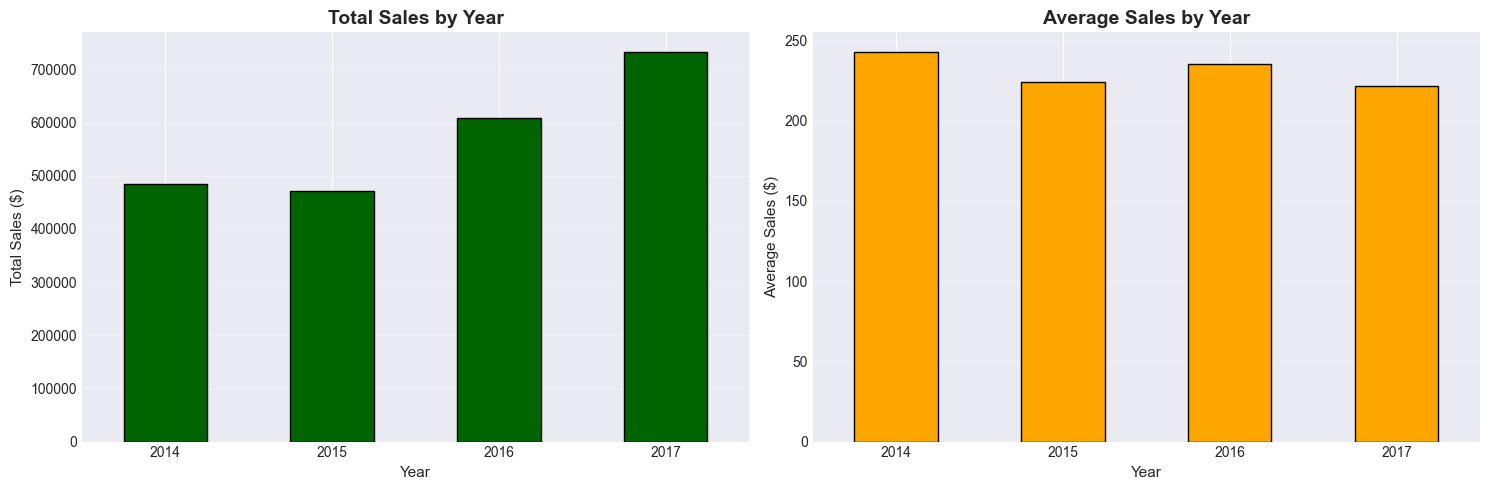


📊 Year-over-Year Summary:
              sum        mean  count
year                                
2014  484247.4981  242.974159   1993
2015  470532.5090  223.849909   2102
2016  609205.5980  235.487282   2587
2017  733215.2552  221.381418   3312

📈 Overall growth rate: +51.4%


In [18]:
# Year-over-year comparison (if multiple years)
if 'year' in df.columns and sales_col:
    yearly_sales = df.groupby('year')[sales_col].agg(['sum', 'mean', 'count'])
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Total sales by year
    yearly_sales['sum'].plot(kind='bar', ax=axes[0], color='darkgreen', edgecolor='black')
    axes[0].set_title('Total Sales by Year', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Year', fontsize=11)
    axes[0].set_ylabel('Total Sales ($)', fontsize=11)
    axes[0].tick_params(axis='x', rotation=0)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Average sales by year
    yearly_sales['mean'].plot(kind='bar', ax=axes[1], color='orange', edgecolor='black')
    axes[1].set_title('Average Sales by Year', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Year', fontsize=11)
    axes[1].set_ylabel('Average Sales ($)', fontsize=11)
    axes[1].tick_params(axis='x', rotation=0)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print('\n📊 Year-over-Year Summary:')
    print(yearly_sales)
    
    # Calculate growth rate if multiple years
    if len(yearly_sales) > 1:
        first_year_sales = yearly_sales['sum'].iloc[0]
        last_year_sales = yearly_sales['sum'].iloc[-1]
        growth_rate = ((last_year_sales / first_year_sales - 1) * 100)
        print(f'\n📈 Overall growth rate: {growth_rate:+.1f}%')

## 7. Key Insights Summary

In [19]:
# Generate comprehensive insights summary
insights = []

print('📝 KEY INSIGHTS DISCOVERED')
print('='*70)

# Insight 1: Time range
if date_col:
    time_span_days = (df[date_col].max() - df[date_col].min()).days
    time_span_years = time_span_days / 365.25
    insight = f"Dataset covers {time_span_days} days ({time_span_years:.1f} years) from {df[date_col].min().date()} to {df[date_col].max().date()}"
    insights.append(insight)
    print(f'\n1. TIME RANGE')
    print(f'   {insight}')

# Insight 2: Sales volume
if sales_col:
    total_sales = df[sales_col].sum()
    avg_sales = df[sales_col].mean()
    insight = f"Total sales: ${total_sales:,.2f} | Average transaction: ${avg_sales:,.2f}"
    insights.append(insight)
    print(f'\n2. SALES VOLUME')
    print(f'   {insight}')

# Insight 3: Monthly patterns
if 'month' in df.columns and sales_col:
    monthly_avg = df.groupby('month')[sales_col].mean()
    peak_month = monthly_avg.idxmax()
    low_month = monthly_avg.idxmin()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    insight = f"Peak sales in {month_names[peak_month-1]}, lowest in {month_names[low_month-1]}"
    insights.append(insight)
    print(f'\n3. MONTHLY SEASONALITY')
    print(f'   {insight}')
    print(f'   Difference: {((monthly_avg.max() / monthly_avg.min() - 1) * 100):.1f}% variation')

# Insight 4: Weekly patterns
if 'day_of_week' in df.columns and sales_col:
    dow_avg = df.groupby('day_of_week')[sales_col].mean()
    best_day = dow_avg.idxmax()
    worst_day = dow_avg.idxmin()
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    insight = f"Best day: {day_names[best_day]}, Worst day: {day_names[worst_day]}"
    insights.append(insight)
    print(f'\n4. WEEKLY PATTERNS')
    print(f'   {insight}')

# Insight 5: Weekend vs Weekday
if 'is_weekend' in df.columns and sales_col:
    weekend_avg = df[df['is_weekend'] == 1][sales_col].mean()
    weekday_avg = df[df['is_weekend'] == 0][sales_col].mean()
    diff_pct = ((weekend_avg / weekday_avg - 1) * 100)
    if diff_pct > 0:
        insight = f"Weekends have {diff_pct:.1f}% higher average sales than weekdays"
    else:
        insight = f"Weekdays have {abs(diff_pct):.1f}% higher average sales than weekends"
    insights.append(insight)
    print(f'\n5. WEEKEND EFFECT')
    print(f'   {insight}')

# Insight 6: Top correlations
if sales_col and sales_col in correlation_matrix.columns:
    sales_corr = correlation_matrix[sales_col].sort_values(ascending=False)
    sales_corr = sales_corr[sales_corr.index != sales_col]
    top_feature = sales_corr.index[0]
    top_corr = sales_corr.iloc[0]
    insight = f"Strongest correlation with sales: {top_feature} ({top_corr:.3f})"
    insights.append(insight)
    print(f'\n6. FEATURE CORRELATIONS')
    print(f'   {insight}')

# Insight 7: Trends
if 'year' in df.columns and sales_col and df['year'].nunique() > 1:
    yearly_totals = df.groupby('year')[sales_col].sum()
    if len(yearly_totals) > 1:
        growth = ((yearly_totals.iloc[-1] / yearly_totals.iloc[0] - 1) * 100)
        if growth > 0:
            insight = f"Sales growing at {growth:.1f}% over the period"
        else:
            insight = f"Sales declining at {abs(growth):.1f}% over the period"
        insights.append(insight)
        print(f'\n7. OVERALL TREND')
        print(f'   {insight}')

print('\n' + '='*70)

📝 KEY INSIGHTS DISCOVERED

1. TIME RANGE
   Dataset covers 1457 days (4.0 years) from 2014-01-03 to 2017-12-30

2. SALES VOLUME
   Total sales: $2,297,200.86 | Average transaction: $229.86

3. MONTHLY SEASONALITY
   Peak sales in Mar, lowest in Feb
   Difference: 47.9% variation

4. WEEKLY PATTERNS
   Best day: Tuesday, Worst day: Saturday

5. WEEKEND EFFECT
   Weekdays have 5.8% higher average sales than weekends

6. FEATURE CORRELATIONS
   Strongest correlation with sales: Profit (0.479)

7. OVERALL TREND
   Sales growing at 51.4% over the period



In [20]:
# Save insights to file
insights_content = '# Exploratory Data Analysis - Key Insights\n\n'
insights_content += f'**Analysis Date:** January 6, 2026\n'
insights_content += f'**Dataset:** Superstore Sales\n'
insights_content += f'**Records Analyzed:** {len(df):,}\n\n'
insights_content += '---\n\n'
insights_content += '## Summary of Findings\n\n'

for i, insight in enumerate(insights, 1):
    insights_content += f'{i}. {insight}\n'

insights_content += '\n---\n\n'
insights_content += '## Business Recommendations\n\n'
insights_content += 'Based on the EDA findings:\n\n'

if 'month' in df.columns and sales_col:
    monthly_avg = df.groupby('month')[sales_col].mean()
    peak_month = monthly_avg.idxmax()
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    insights_content += f'1. **Inventory Planning:** Increase stock levels for {month_names[peak_month-1]} (peak sales month)\n'

if 'day_of_week' in df.columns and sales_col:
    dow_avg = df.groupby('day_of_week')[sales_col].mean()
    best_day = dow_avg.idxmax()
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    insights_content += f'2. **Staffing:** Schedule more staff on {day_names[best_day]}s (highest sales day)\n'

insights_content += '3. **Forecasting Focus:** Use lag features and rolling averages for better predictions\n'
insights_content += '4. **Marketing:** Time promotions during typically slow periods to boost sales\n'

insights_content += '\n---\n\n'
insights_content += '## Next Steps\n\n'
insights_content += '1. Prepare data for modeling (train/test split)\n'
insights_content += '2. Train baseline forecasting model\n'
insights_content += '3. Try advanced models (Random Forest, XGBoost)\n'
insights_content += '4. Evaluate model performance\n'
insights_content += '5. Create business-friendly visualizations\n'

# Save to file
insights_path = '../reports/eda_insights.md'
with open(insights_path, 'w') as f:
    f.write(insights_content)

print(f'\n💾 Insights saved to: {insights_path}')
print('\n' + '='*70)
print('✅ EXPLORATORY DATA ANALYSIS COMPLETED!')
print('='*70)


💾 Insights saved to: ../reports/eda_insights.md

✅ EXPLORATORY DATA ANALYSIS COMPLETED!


## ✅ Phase 6 Complete!

### What We Accomplished:

1. ✅ **Sales Trend Visualization**
   - Plotted sales over entire time period
   - Added moving averages to show trends
   - Aggregated daily totals for clearer patterns

2. ✅ **Monthly Seasonality Analysis**
   - Identified peak and low sales months
   - Analyzed quarterly patterns
   - Calculated month-to-month variations

3. ✅ **Day of Week Patterns**
   - Found best and worst sales days
   - Compared weekend vs weekday performance
   - Identified weekly transaction patterns

4. ✅ **Correlation Analysis**
   - Created comprehensive correlation matrix
   - Identified features most correlated with sales
   - Analyzed engineered features relationships

5. ✅ **Additional Insights**
   - Sales distribution analysis
   - Year-over-year growth trends
   - Outlier detection

### Deliverables:
- ✅ EDA notebook with comprehensive visualizations
- ✅ Key insights document: `reports/eda_insights.md`
- ✅ Business recommendations based on findings

### Ready for Next Phase:
**Step 7: Data Preparation for Modeling**
- Select features for modeling
- Time-based train/test split
- Handle missing values from lag features
- Scale features if necessary